# Cardiovascular Disease Analysis using Machine Learning

## Import Libraries

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pandas import DataFrame

In [126]:
#Reading the csv file
df=pd.read_csv('cardiocsv.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [127]:
#Converting age from number of days to years
df['age']=round(df['age']/365)

In [128]:
#dropping the id
df=df.drop(['id'],axis=1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [129]:
#Checking the data do it contain any null value and the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.4 MB


In [130]:
df.shape

(70000, 12)

In [131]:
#Number of people who has cardiovascular disease
df.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [132]:
#Percentage of people who has cardiovascular disease
cardiono=len(df[df.cardio==0])
cardioyes=len(df[df.cardio==1])

b=(df['cardio'].value_counts()/df['cardio'].count())*100
b

0    50.03
1    49.97
Name: cardio, dtype: float64

In [133]:
#Grouping the mean of cardio
df.groupby('cardio').mean()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,,,,,,,,,,,
0,51.731218,1.345707,164.448017,71.592150,120.432598,84.251763,1.216527,1.175380,0.092516,0.055424,0.817881
1,54.948083,1.353441,164.270334,76.822368,137.212042,109.023929,1.517396,1.277595,0.083736,0.052117,0.789559


In [134]:
#Describes the details like count,mean,min,max 
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


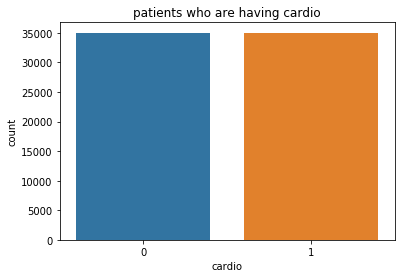

In [135]:
#Balanced data  
import seaborn as sns
sns.countplot(x='cardio',data=df)
plt.title('patients who are having cardio')
plt.show()

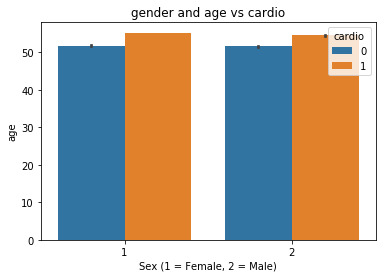

In [136]:
sns.barplot(df['gender'],df['age'],hue=df['cardio'])
plt.xlabel('Sex (1 = Female, 2 = Male)')
plt.title('gender and age vs cardio')
plt.show()

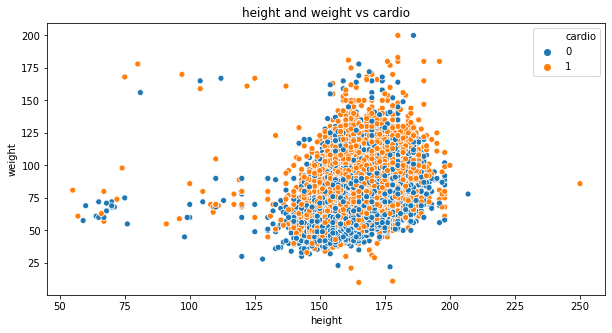

In [137]:
#Height and weight vs cardio
plt.figure(figsize=(10,5))
a=df['height']
b=df['weight']
plt.title('height and weight vs cardio')
sns.scatterplot(a,b,hue=df['cardio'])
plt.show()

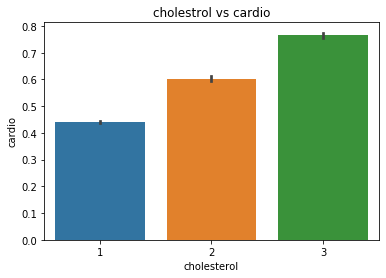

In [138]:
#Cholestrol vs cardio
sns.barplot(df['cholesterol'],df['cardio'])
plt.title('cholestrol vs cardio')
plt.show()

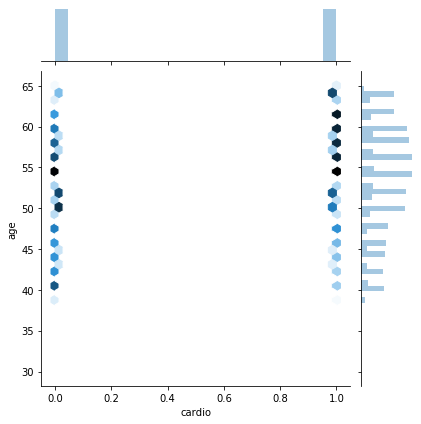

In [139]:
#In this jointplot we can clearly see that above age 55 has higher chances of getting affected
sns.jointplot(x='cardio',y='age',data=df,kind='hex')
plt.show()

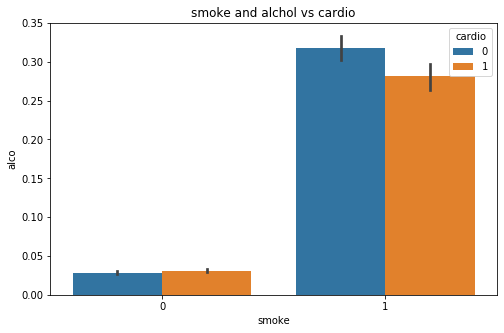

In [140]:
#Smoke and alcohol vs cardio
plt.figure(figsize=(8,5))
a=df['smoke']
b=df['alco']
sns.barplot(a,b,hue=df['cardio'])
plt.title('smoke and alchol vs cardio')
plt.show()

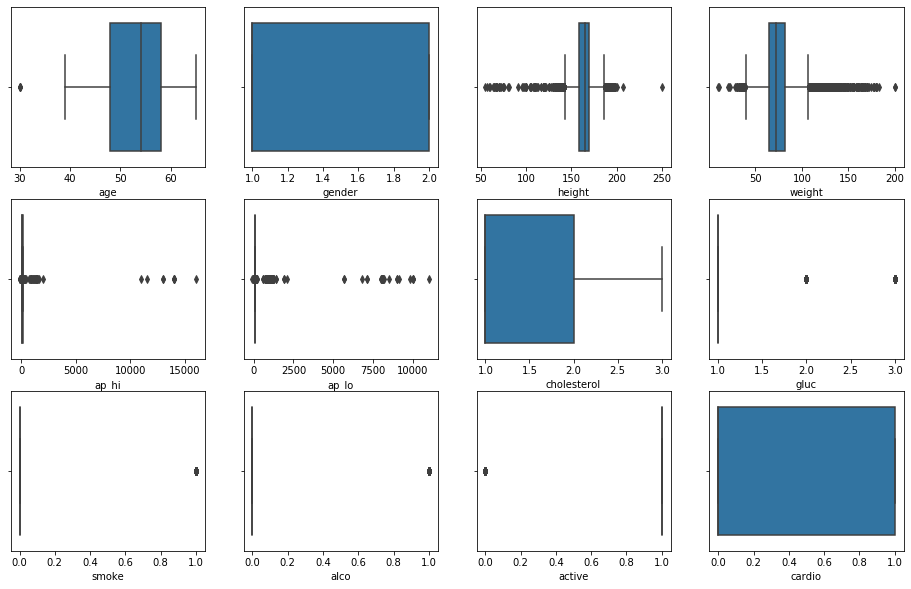

In [141]:
#Boxplot
box= ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

eda_df = df.loc[:,box].copy()
plt.figure(figsize=(16, 10))

for i in range(len(eda_df.columns)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(eda_df[eda_df.columns[i]])

plt.show()

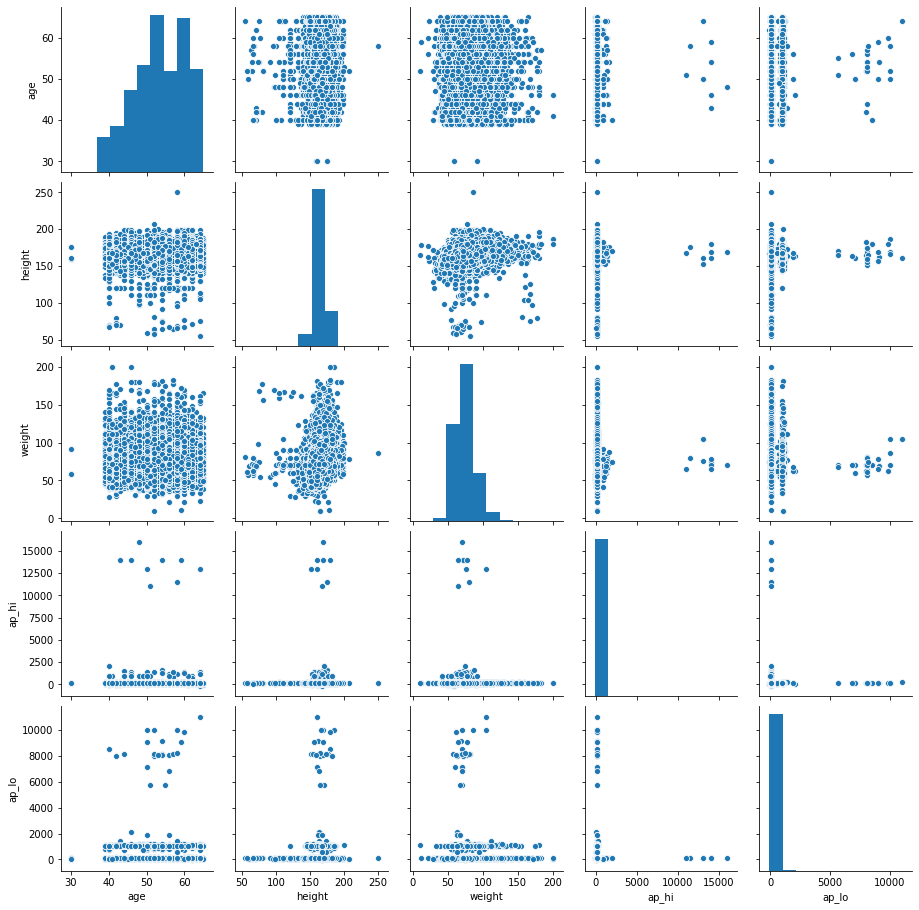

In [142]:
#plotting the numerical data 
dfg = df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']]
sns.pairplot(dfg)
plt.show()

In [143]:
#creating dummies for the categorical data 
glucose=df['gluc']
glucose=pd.get_dummies((glucose),prefix='glucose')
glucose.head()

,glucose_1,glucose_2,glucose_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [144]:
sex=df['gender']
sex=pd.get_dummies((sex),prefix='sex')
sex.head()

,sex_1,sex_2
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


In [145]:
chol = df["cholesterol"]
chol = pd.get_dummies((chol),prefix='chol')
chol.head()

,chol_1,chol_2,chol_3
0,1,0,0
1,0,0,1
2,0,0,1
3,1,0,0
4,1,0,0


In [146]:
X=df.iloc[:,:-1]
y=df['cardio']

In [147]:
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50.0,2,168,62.0,110,80,1,1,0,0,1
1,55.0,1,156,85.0,140,90,3,1,0,0,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0
3,48.0,2,169,82.0,150,100,1,1,0,0,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0


In [148]:
#Convering the categorical values to dummies 
#X=pd.concat([X,glucose,sex,chol],axis=1)
#X=X.drop(['glucose','sex','chol'],axis=1)
#X = X.drop(columns = ['glucose'],axis=1)
#X=X.drop(['glucose_1','glucose_2','glucose_3'],axis=1)
#X=X.drop(['chol_1','chol_2','chol_3'],axis=1)
#X=X.drop(['sex_1','sex_2'],axis=1)
X=pd.concat([X,glucose,sex,chol],axis=1)
#X=X.drop(['id'],axis=1)
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,glucose_1,glucose_2,glucose_3,sex_1,sex_2,chol_1,chol_2,chol_3
0,50.0,2,168,62.0,110,80,1,1,0,0,1,1,0,0,0,1,1,0,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,0,0,1,0,0,0,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,0,0,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,0,0,0,1,1,0,0
4,48.0,1,156,56.0,100,60,1,1,0,0,0,1,0,0,1,0,1,0,0


In [149]:
#Dropping the categorical data 
#X=X.drop(['gender','gluc','cholesterol'],axis=1)
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,glucose_1,glucose_2,glucose_3,sex_1,sex_2,chol_1,chol_2,chol_3
0,50.0,2,168,62.0,110,80,1,1,0,0,1,1,0,0,0,1,1,0,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,0,0,1,0,0,0,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,0,0,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,0,0,0,1,1,0,0
4,48.0,1,156,56.0,100,60,1,1,0,0,0,1,0,0,1,0,1,0,0


In [151]:
#X=X.drop(['gender','gluc','cholesterol'],axis=1)

In [152]:
X.shape

(70000, 16)

In [153]:
#Feature importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
Featu_imp  = ExtraTreesRegressor()
Featu_imp .fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [154]:
print(Featu_imp.feature_importances_)

[0.1226853  0.23491307 0.21241076 0.18043445 0.11377862 0.01359867
 0.01165801 0.01214371 0.00907112 0.00751046 0.00758918 0.01105376
 0.01097595 0.04502343 0.00320456 0.00394897]


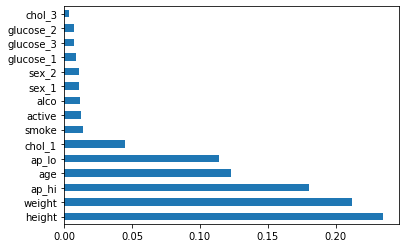

In [155]:
#Extracting the important features from the data 
featur_importances = pd.Series(Featu_imp.feature_importances_, index=X.columns)
featur_importances.nlargest(15).plot(kind='barh')
plt.show()

In [156]:
#Correlation
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.023017,-0.081456,0.053661,0.020793,0.017754,0.154386,0.098596,-0.047884,-0.029918,-0.009819,0.237749
gender,-0.023017,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081456,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053661,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020793,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017754,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154386,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098596,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047884,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029918,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


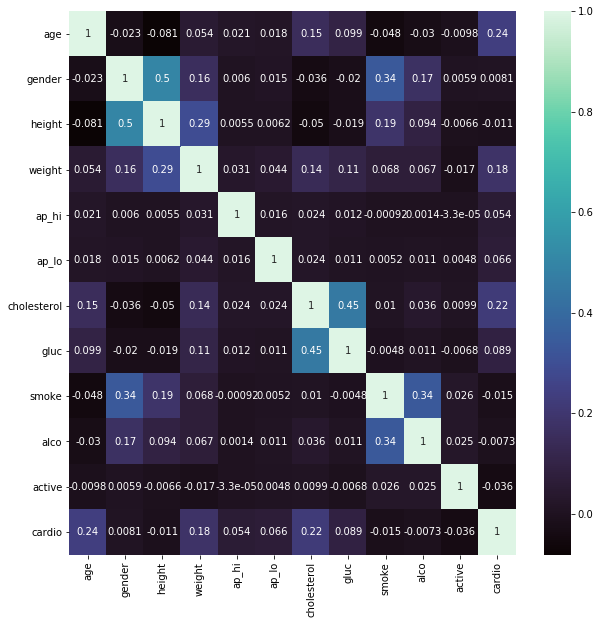

In [157]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='mako')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

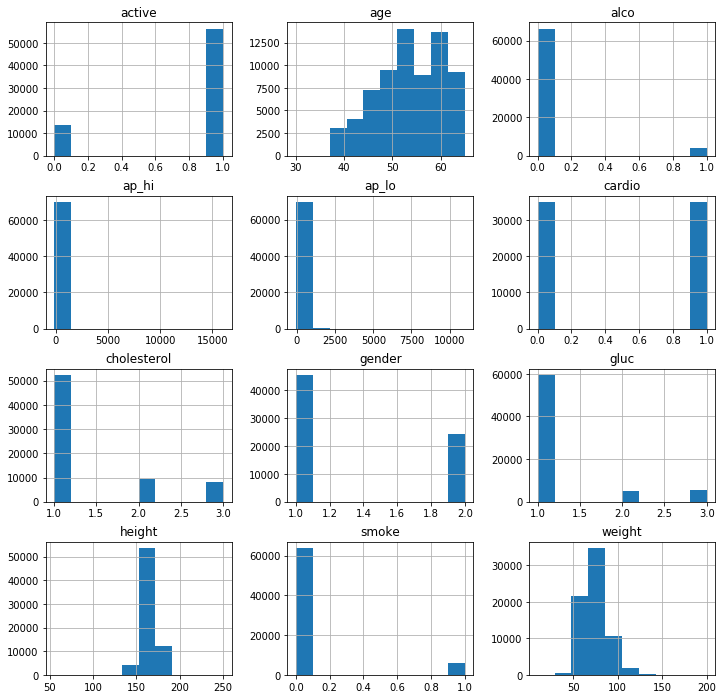

In [158]:
df.hist(figsize=(12,12))
plt.show

In [159]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
import matplotlib.pyplot as plt
%matplotlib inline


In [160]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.493505,0.443452,-0.847873,-0.122182,-0.088238,-0.310879,-0.238384,0.494167,0.420578,-0.282985,-0.287115,-1.364055,1.364055,0.579880,-0.397445,-0.360881
1,0.245566,-1.018168,0.749831,0.072610,-0.035180,-0.310879,-0.238384,0.494167,0.420578,-0.282985,-0.287115,0.733108,-0.733108,-1.724496,-0.397445,2.770993
2,-0.197877,0.078047,-0.708942,0.007679,-0.141297,-0.310879,-0.238384,-2.023607,0.420578,-0.282985,-0.287115,0.733108,-0.733108,-1.724496,-0.397445,2.770993
3,-0.789134,0.565254,0.541435,0.137541,0.017879,-0.310879,-0.238384,0.494167,0.420578,-0.282985,-0.287115,-1.364055,1.364055,0.579880,-0.397445,-0.360881
4,-0.789134,-1.018168,-1.264666,-0.187113,-0.194356,-0.310879,-0.238384,-2.023607,0.420578,-0.282985,-0.287115,0.733108,-0.733108,0.579880,-0.397445,-0.360881


(array([2.0000e+00, 4.0000e+00, 3.7000e+01, 5.8900e+02, 5.1550e+03,
        1.6396e+04, 2.1782e+04, 1.2977e+04, 7.6470e+03, 3.0150e+03,
        1.4730e+03, 5.1600e+02, 2.3800e+02, 7.9000e+01, 3.4000e+01,
        1.8000e+01, 2.4000e+01, 1.0000e+01, 2.0000e+00, 2.0000e+00]),
 array([-4.46007459, -3.8001532 , -3.1402318 , -2.4803104 , -1.82038901,
        -1.16046761, -0.50054621,  0.15937519,  0.81929658,  1.47921798,
         2.13913938,  2.79906077,  3.45898217,  4.11890357,  4.77882496,
         5.43874636,  6.09866776,  6.75858916,  7.41851055,  8.07843195,
         8.73835335]),
 <a list of 20 Patch objects>)

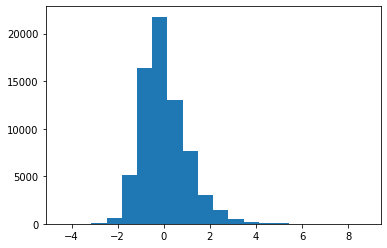

In [161]:
plt.hist(X[:,2],bins=20)

# Splitting the data 

In [162]:
from sklearn.model_selection import train_test_split

In [173]:
#Splitting the data into train and test split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [164]:
X_train.shape,X_test.shape

((52500, 16), (17500, 16))

In [165]:
y_train.shape,y_test.shape

((52500,), (17500,))

# K NEAREST NEIGHBOUR

In [185]:
#KNN
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [186]:
knn_test_pred = knn.predict(X_test)
knn_train_pred=knn.predict(X_train)
knn_test_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [187]:
print( 'Accuracy for testing:',accuracy_score(knn_test_pred, y_test)*100)
print('Accuracy for training:',accuracy_score(knn_train_pred,y_train)*100)


Accuracy for testing: 65.66285714285715
Accuracy for training: 74.41904761904762


In [177]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
print(confusion_matrix(y_test,knn_test_pred))
print(classification_report(y_test,knn_test_pred))

[[6463 2146]
 [2731 6160]]
              precision    recall  f1-score   support

           0       0.70      0.75      0.73      8609
           1       0.74      0.69      0.72      8891

    accuracy                           0.72     17500
   macro avg       0.72      0.72      0.72     17500
weighted avg       0.72      0.72      0.72     17500



In [178]:
tp, fn, fp, tn = confusion_matrix(y_test,knn_test_pred).ravel()
tp, fn, fp, tn

(6463, 2146, 2731, 6160)

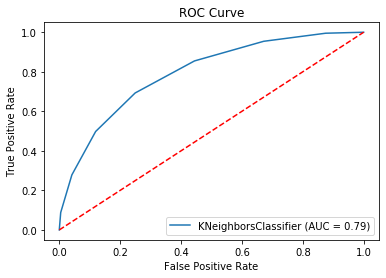

In [179]:
plot_roc_curve(knn, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1],'r--')
plt.show()

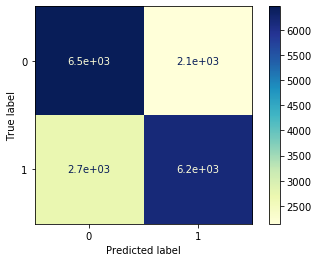

In [180]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn,X_test,y_test,cmap="YlGnBu")
plt.show()

# LOGISTIC REGRESSION

In [181]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
Logistic_re = LogisticRegression()
Logistic_re.fit(X_train, y_train)
lo_pred = Logistic_re.predict(X_test)
lo_train_pred=Logistic_re.predict(X_train)
lo_pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [182]:
#print("Test Accuracy:",Logistic_re.score(X_test, y_test)*100)
print('accuracy for the training data:',accuracy_score(lo_train_pred,y_train)*100)
print('accuracy for the testing data:',accuracy_score(lo_pred,y_test)*100)

accuracy for the training data: 72.24571428571429
accuracy for the testing data: 72.08


In [183]:
print(confusion_matrix(y_test,lo_pred))
print(classification_report(y_test,lo_pred))

[[6655 1954]
 [2932 5959]]
              precision    recall  f1-score   support

           0       0.69      0.77      0.73      8609
           1       0.75      0.67      0.71      8891

    accuracy                           0.72     17500
   macro avg       0.72      0.72      0.72     17500
weighted avg       0.72      0.72      0.72     17500



In [184]:
tp, fn, fp, tn = confusion_matrix(y_test,lo_pred).ravel()
tp, fn, fp, tn

(6655, 1954, 2932, 5959)

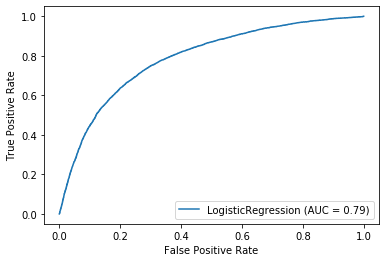

In [84]:
plot_roc_curve(Logistic_re,X_test,y_test)

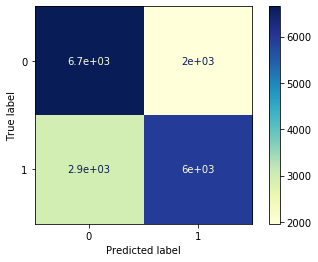

In [85]:
plot_confusion_matrix(Logistic_re,X_test,y_test,cmap="YlGnBu")

# RANDOM FOREST

In [86]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
Random_fo=RandomForestClassifier()
Random_fo.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [87]:
rf_train_pred=Random_fo.predict(X_train)
rf_pred=Random_fo.predict(X_test)
rf_pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [88]:
print("Accuracy for training data using random forest:",accuracy_score(rf_train_pred,y_train)*100)
print('accuracy for testing data using random forest:',accuracy_score(rf_pred,y_test)*100)

Accuracy for training data using random forest: 99.98095238095239
accuracy for testing data using random forest: 71.46857142857142


In [89]:
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[6329 2280]
 [2713 6178]]
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      8609
           1       0.73      0.69      0.71      8891

    accuracy                           0.71     17500
   macro avg       0.72      0.72      0.71     17500
weighted avg       0.72      0.71      0.71     17500



In [122]:
tp, fn, fp, tn = confusion_matrix(y_test,rf_pred).ravel()
tp, fn, fp, tn

(6329, 2280, 2713, 6178)

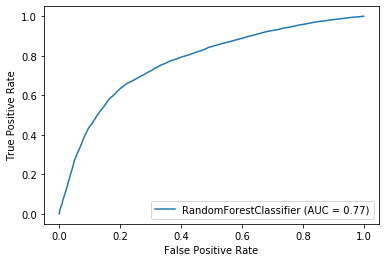

In [90]:
plot_roc_curve(Random_fo,X_test,y_test)

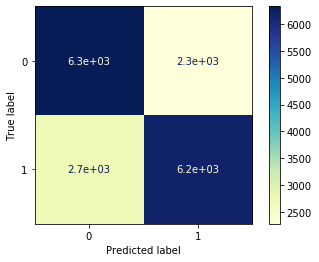

In [91]:
plot_confusion_matrix(Random_fo,X_test,y_test,cmap="YlGnBu")

# SUPPORT VECTOR MACHINE

In [92]:
#Support Vector Machine
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [93]:
sv_train_pred=svm.predict(X_train)
sv_pred=svm.predict(X_test)
sv_pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [94]:
print(" Accuracy for SVM using training data:",accuracy_score(sv_train_pred, y_train)*100)
print(" Accuracy for SVM using testing data:",accuracy_score(sv_pred,y_test)*100)

 Accuracy for SVM using training data: 72.95238095238096
 Accuracy for SVM using testing data: 72.42285714285714


In [95]:
print(confusion_matrix(sv_pred,y_test))

[[6606 2823]
 [2003 6068]]


In [96]:
print(classification_report(sv_pred,y_test))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73      9429
           1       0.68      0.75      0.72      8071

    accuracy                           0.72     17500
   macro avg       0.72      0.73      0.72     17500
weighted avg       0.73      0.72      0.72     17500



In [120]:
tp, fn, fp, tn = confusion_matrix(y_test,sv_pred).ravel()
tp, fn, fp, tn

(6606, 2003, 2823, 6068)

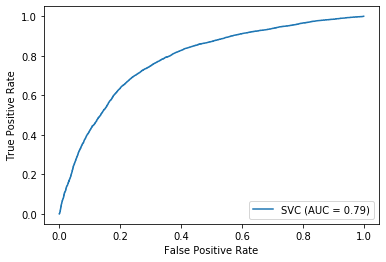

In [97]:
plot_roc_curve(svm,X_test,y_test)

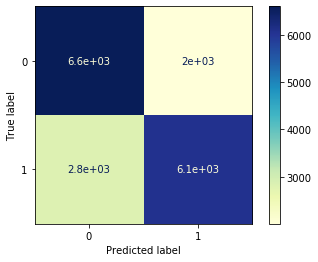

In [98]:
plot_confusion_matrix(svm,X_test,y_test,cmap="YlGnBu")

# NAIVE BAYES

In [99]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
Gnb=GaussianNB()
Gnb.fit(X_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [100]:
gnb_train_pred=Gnb.predict(X_train)
gnb_pred=Gnb.predict(X_test)
gnb_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [101]:
print('accuracy for training using Gnb:',accuracy_score(gnb_train_pred,y_train)*100)
print('accuracy for testing using Gnb:',accuracy_score(gnb_pred,y_test)*100)

accuracy for training using Gnb: 59.96190476190476
accuracy for testing using Gnb: 59.262857142857136


In [102]:
print(confusion_matrix(gnb_pred,y_test))
print(classification_report(gnb_pred,y_test))

[[7050 5570]
 [1559 3321]]
              precision    recall  f1-score   support

           0       0.82      0.56      0.66     12620
           1       0.37      0.68      0.48      4880

    accuracy                           0.59     17500
   macro avg       0.60      0.62      0.57     17500
weighted avg       0.69      0.59      0.61     17500



In [121]:
tp, fn, fp, tn = confusion_matrix(y_test,gnb_pred).ravel()
tp, fn, fp, tn

(7050, 1559, 5570, 3321)

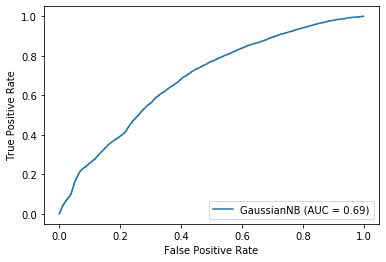

In [103]:
plot_roc_curve(Gnb,X_test,y_test)

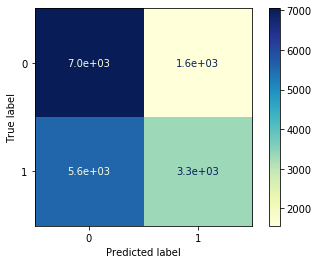

In [104]:
plot_confusion_matrix(Gnb,X_test,y_test,cmap="YlGnBu")

In [111]:
accuracy={'knn':65.80,'LogisticReg':72.02,'SVM':72.41,'Naviebayes':59.22,'RandomFore':71.46}

accuracy

{'knn': 65.8,
 'LogisticReg': 72.02,
 'SVM': 72.41,
 'Naviebayes': 59.22,
 'RandomFore': 71.46}

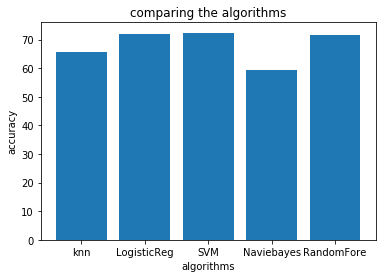

In [112]:
names = list(accuracy.keys())
values = list(accuracy.values())
plt.bar(names,values)
plt.ylabel("accuracy")
plt.xlabel("algorithms")
plt.title("comparing the algorithms")
plt.show()